
# Project: Investigate Gun Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#wrangling2">Data Wrangling Part 2</a></li>
<li><a href="#eda2">Exploratory Data Analysis Part 2</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report and analysis is based on the data that comes from the FBI's Nation Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn't otherwise ineligible to make a purchase. The data has been supplemented with state level census data which is also used in this report to study and deliver insights. 

> Analysis done on this dataset was with the motive of delivering answers to the seven questions asked below:


In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

#### Research Questions:


>1- What is the overall trend of criminal background checks done across the whole country? (based 2001-2017 data).<br>
>2- Which are the five states with the highest and lowest background checks done so far? (based on 1998-2017 data).<br>
>3- Does population of any Age group play a role in the number of background checks done? (based on 2016 data)<br>
>4- Does any specific Race play a role in the number of background checks done? (based on 2016 data)<br>
5- Does Firm ownership play a role in the number of background checks done? (based on 2012 data)<br>
6- Does the percent of Educated population play a role in the number of background checks done? (based on 2011-15 data)<br>
7- Does the number of veteran population play a role in the number of background checks done? (based on 2011-15 data)<br>

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data is loaded, checked for cleanliness, and then trimmed and cleaned for analysis. 
<br> <br>Prior to loading the dataset 'u.s.-census-data edited V2', it was slightly cleaned using Microsoft Excel:<br>
>-Categories for further analysis were selected and the remaining data was discarded. 
<br> -Formats of numeric data columns were set to be consistent (Percent/Number formats were set).<br> -Row headers were edited to be shorter.



In [302]:
# Loading data 
df_census = pd.read_csv('u.s.-census-data edited V2.csv')
df_gun = pd.read_excel('gun-data.xlsx')

#### Dataset 1 - U.S Census data

In [303]:
df_census.head() #understanding the data.

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Persons under 5 years, 2016 (%)",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,7.10%,6.10%,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
1,"Persons under 18 years, 2016 (%)",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,24.60%,22.60%,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
2,"Persons 65 years and over, 2016 (%)",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,16.00%,15.70%,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
3,"White alone, 2016 (%)",69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,...,85.20%,78.70%,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
4,"Black or African American alone, 2016 (%)",26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,...,2.00%,17.10%,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%


In [304]:
df_census = df_census.transpose() #Transposing the dataset to have States as row headers as 
#  this dataset will be merged with the gun dataset at a later point on the column 'States'

In [305]:
df_census.head() #confirming dataframe transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Fact,"Persons under 5 years, 2016 (%)","Persons under 18 years, 2016 (%)","Persons 65 years and over, 2016 (%)","White alone, 2016 (%)","Black or African American alone, 2016 (%)","American Indian and Alaska Native alone, 2016 (%)","Asian alone, percent, 2016 (%)",Native Hawaiian and Other Pacific Islander alo...,"Hispanic or Latino, 2016 (%)","High school graduate or higher, 2011-2015 (%)","Bachelor's degree or higher, 2011-2015 (%)","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Veterans, 2011-2015"
Alabama,6.00%,22.60%,16.10%,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%,84.30%,23.50%,203604,137630,92219,272651,41943,316984,363170
Alaska,7.30%,25.20%,10.40%,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%,92.10%,28.00%,35402,22141,13688,51147,7953,56091,69323
Arizona,6.30%,23.50%,16.90%,83.30%,4.90%,5.40%,3.40%,0.30%,30.90%,86.00%,27.50%,245243,182425,135313,344981,46780,427582,505794
Arkansas,6.40%,23.60%,16.30%,79.40%,15.70%,1.00%,1.60%,0.30%,7.30%,84.80%,21.10%,123158,75962,35982,189029,25915,192988,220953


In [306]:
df_census.to_csv('df_newcensus.csv') #writing the transposed dataframe into a new file

In [307]:
df_newcensus = pd.read_csv('df_newcensus.csv',header=1) #reading the new census file and setting row #1 as column header

In [308]:
df_newcensus #understand the data. Column 'Native Hawaiian and Other Pacific Islander alone, 2016 (%)' found to have 
#  erroneus data in few rows ('Z'). This is dealt with at a later point. 

,Fact,"Persons under 5 years, 2016 (%)","Persons under 18 years, 2016 (%)","Persons 65 years and over, 2016 (%)","White alone, 2016 (%)","Black or African American alone, 2016 (%)","American Indian and Alaska Native alone, 2016 (%)","Asian alone, percent, 2016 (%)","Native Hawaiian and Other Pacific Islander alone, 2016 (%)","Hispanic or Latino, 2016 (%)","High school graduate or higher, 2011-2015 (%)","Bachelor's degree or higher, 2011-2015 (%)","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Veterans, 2011-2015"
0,Alabama,6.00%,22.60%,16.10%,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%,84.30%,23.50%,203604,137630,92219,272651,41943,316984,363170
1,Alaska,7.30%,25.20%,10.40%,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%,92.10%,28.00%,35402,22141,13688,51147,7953,56091,69323
2,Arizona,6.30%,23.50%,16.90%,83.30%,4.90%,5.40%,3.40%,0.30%,30.90%,86.00%,27.50%,245243,182425,135313,344981,46780,427582,505794
3,Arkansas,6.40%,23.60%,16.30%,79.40%,15.70%,1.00%,1.60%,0.30%,7.30%,84.80%,21.10%,123158,75962,35982,189029,25915,192988,220953
4,California,6.30%,23.20%,13.60%,72.70%,6.50%,1.70%,14.80%,0.50%,38.90%,81.80%,31.40%,1852580,1320085,1619857,1819107,252377,3176341,1777410
5,Colorado,6.10%,22.80%,13.40%,87.50%,4.50%,1.60%,3.30%,0.20%,21.30%,90.70%,38.10%,284554,194508,85849,442365,51722,469524,391725
6,Connecticut,5.20%,21.10%,16.10%,80.60%,11.80%,0.50%,4.70%,0.10%,15.70%,89.90%,37.60%,187845,106678,56113,259614,31056,281182,199331
7,Delaware,5.80%,21.50%,17.50%,70.10%,22.60%,0.60%,4.00%,0.10%,9.20%,88.40%,30.00%,38328,23964,14440,54782,7206,60318,71213
8,Florida,5.50%,20.10%,19.90%,77.60%,16.80%,0.50%,2.90%,0.10%,24.90%,86.90%,27.30%,1084885,807817,926112,1121749,185756,1846686,1507738
9,Georgia,6.40%,24.40%,13.10%,61.20%,32.00%,0.50%,4.10%,0.10%,9.40%,85.40%,28.80%,480578,376506,371588,538893,96787,800585,670617


In [309]:
df_newcensus.info() #Checking for missing values. No missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Fact                                                        50 non-null     object
 1   Persons under 5 years, 2016 (%)                             50 non-null     object
 2   Persons under 18 years, 2016 (%)                            50 non-null     object
 3   Persons 65 years and over, 2016 (%)                         50 non-null     object
 4   White alone, 2016 (%)                                       50 non-null     object
 5   Black or African American alone, 2016 (%)                   50 non-null     object
 6   American Indian and Alaska Native alone, 2016 (%)           50 non-null     object
 7   Asian alone, percent, 2016 (%)                              50 non-null     object
 8   Native Hawai

In [310]:
df_newcensus=df_newcensus.rename(columns = {'Fact':'State'}) #changing column name

In [311]:
df_newcensus.columns

Index(['State', 'Persons under 5 years, 2016 (%)',
       'Persons under 18 years, 2016 (%)',
       'Persons 65 years and over, 2016 (%)', 'White alone, 2016 (%)',
       'Black or African American alone, 2016 (%)',
       'American Indian and Alaska Native alone, 2016 (%)',
       'Asian alone, percent, 2016 (%)',
       'Native Hawaiian and Other Pacific Islander alone, 2016 (%)',
       'Hispanic or Latino, 2016 (%)',
       'High school graduate or higher, 2011-2015 (%)',
       'Bachelor's degree or higher, 2011-2015 (%)', 'Men-owned firms, 2012',
       'Women-owned firms, 2012', 'Minority-owned firms, 2012',
       'Nonminority-owned firms, 2012', 'Veteran-owned firms, 2012',
       'Nonveteran-owned firms, 2012', 'Veterans, 2011-2015'],
      dtype='object')

In [312]:
#Eliminating all '%' symbols in the numeric data 

df_newcensus['Persons under 5 years, 2016 (%)']=df_newcensus['Persons under 5 years, 2016 (%)'].str.replace('%','')
df_newcensus['Persons under 18 years, 2016 (%)']=df_newcensus['Persons under 18 years, 2016 (%)'].str.replace('%','')
df_newcensus['Persons 65 years and over, 2016 (%)']=df_newcensus['Persons 65 years and over, 2016 (%)'].str.replace('%','')
df_newcensus['White alone, 2016 (%)']=df_newcensus['White alone, 2016 (%)'].str.replace('%','')
df_newcensus[ 'Black or African American alone, 2016 (%)']=df_newcensus[ 'Black or African American alone, 2016 (%)'].str.replace('%','')
df_newcensus['American Indian and Alaska Native alone, 2016 (%)']=df_newcensus['American Indian and Alaska Native alone, 2016 (%)'].str.replace('%','')
df_newcensus['Asian alone, percent, 2016 (%)']=df_newcensus['Asian alone, percent, 2016 (%)'].str.replace('%','')
df_newcensus['Native Hawaiian and Other Pacific Islander alone, 2016 (%)']=df_newcensus['Native Hawaiian and Other Pacific Islander alone, 2016 (%)'].str.replace('%','')
df_newcensus['Hispanic or Latino, 2016 (%)']=df_newcensus['Hispanic or Latino, 2016 (%)'].str.replace('%','')
df_newcensus['High school graduate or higher, 2011-2015 (%)']=df_newcensus['High school graduate or higher, 2011-2015 (%)'].str.replace('%','')
df_newcensus[ "Bachelor's degree or higher, 2011-2015 (%)"]=df_newcensus[ "Bachelor's degree or higher, 2011-2015 (%)"].str.replace('%','')

#Replacing erroneous data with the mode of the specific column
df_newcensus['Native Hawaiian and Other Pacific Islander alone, 2016 (%)']=df_newcensus['Native Hawaiian and Other Pacific Islander alone, 2016 (%)'].str.replace('Z','0.10')


In [313]:
df_newcensus #reconfirming the changes made. No '%' symbols in the data.

,State,"Persons under 5 years, 2016 (%)","Persons under 18 years, 2016 (%)","Persons 65 years and over, 2016 (%)","White alone, 2016 (%)","Black or African American alone, 2016 (%)","American Indian and Alaska Native alone, 2016 (%)","Asian alone, percent, 2016 (%)","Native Hawaiian and Other Pacific Islander alone, 2016 (%)","Hispanic or Latino, 2016 (%)","High school graduate or higher, 2011-2015 (%)","Bachelor's degree or higher, 2011-2015 (%)","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Veterans, 2011-2015"
0,Alabama,6.00,22.60,16.10,69.30,26.80,0.70,1.40,0.10,4.20,84.30,23.50,203604,137630,92219,272651,41943,316984,363170
1,Alaska,7.30,25.20,10.40,66.10,3.80,15.20,6.30,1.30,7.00,92.10,28.00,35402,22141,13688,51147,7953,56091,69323
2,Arizona,6.30,23.50,16.90,83.30,4.90,5.40,3.40,0.30,30.90,86.00,27.50,245243,182425,135313,344981,46780,427582,505794
3,Arkansas,6.40,23.60,16.30,79.40,15.70,1.00,1.60,0.30,7.30,84.80,21.10,123158,75962,35982,189029,25915,192988,220953
4,California,6.30,23.20,13.60,72.70,6.50,1.70,14.80,0.50,38.90,81.80,31.40,1852580,1320085,1619857,1819107,252377,3176341,1777410
5,Colorado,6.10,22.80,13.40,87.50,4.50,1.60,3.30,0.20,21.30,90.70,38.10,284554,194508,85849,442365,51722,469524,391725
6,Connecticut,5.20,21.10,16.10,80.60,11.80,0.50,4.70,0.10,15.70,89.90,37.60,187845,106678,56113,259614,31056,281182,199331
7,Delaware,5.80,21.50,17.50,70.10,22.60,0.60,4.00,0.10,9.20,88.40,30.00,38328,23964,14440,54782,7206,60318,71213
8,Florida,5.50,20.10,19.90,77.60,16.80,0.50,2.90,0.10,24.90,86.90,27.30,1084885,807817,926112,1121749,185756,1846686,1507738
9,Georgia,6.40,24.40,13.10,61.20,32.00,0.50,4.10,0.10,9.40,85.40,28.80,480578,376506,371588,538893,96787,800585,670617


In [314]:
df_newcensus.dtypes #checking datatypes of each column. Datatypes need changes.

State                                                         object
Persons under 5 years, 2016 (%)                               object
Persons under 18 years, 2016 (%)                              object
Persons 65 years and over, 2016 (%)                           object
White alone, 2016 (%)                                         object
Black or African American alone, 2016 (%)                     object
American Indian and Alaska Native alone, 2016 (%)             object
Asian alone, percent, 2016 (%)                                object
Native Hawaiian and Other Pacific Islander alone, 2016 (%)    object
Hispanic or Latino, 2016 (%)                                  object
High school graduate or higher, 2011-2015 (%)                 object
Bachelor's degree or higher, 2011-2015 (%)                    object
Men-owned firms, 2012                                          int64
Women-owned firms, 2012                                        int64
Minority-owned firms, 2012        

In [315]:
cols = df_newcensus.columns #defining an array 'cols' containing names of all columns
cols

Index(['State', 'Persons under 5 years, 2016 (%)',
       'Persons under 18 years, 2016 (%)',
       'Persons 65 years and over, 2016 (%)', 'White alone, 2016 (%)',
       'Black or African American alone, 2016 (%)',
       'American Indian and Alaska Native alone, 2016 (%)',
       'Asian alone, percent, 2016 (%)',
       'Native Hawaiian and Other Pacific Islander alone, 2016 (%)',
       'Hispanic or Latino, 2016 (%)',
       'High school graduate or higher, 2011-2015 (%)',
       'Bachelor's degree or higher, 2011-2015 (%)', 'Men-owned firms, 2012',
       'Women-owned firms, 2012', 'Minority-owned firms, 2012',
       'Nonminority-owned firms, 2012', 'Veteran-owned firms, 2012',
       'Nonveteran-owned firms, 2012', 'Veterans, 2011-2015'],
      dtype='object')

In [316]:
cols = df_newcensus.columns.drop('State') #dropping 'State' from the array as its datatype requires no change.
df_newcensus[cols] = df_newcensus[cols].apply(pd.to_numeric, errors='coerce') #converting all string datatypes to numeric.
df_newcensus.dtypes #rechecking datatypes

State                                                          object
Persons under 5 years, 2016 (%)                               float64
Persons under 18 years, 2016 (%)                              float64
Persons 65 years and over, 2016 (%)                           float64
White alone, 2016 (%)                                         float64
Black or African American alone, 2016 (%)                     float64
American Indian and Alaska Native alone, 2016 (%)             float64
Asian alone, percent, 2016 (%)                                float64
Native Hawaiian and Other Pacific Islander alone, 2016 (%)    float64
Hispanic or Latino, 2016 (%)                                  float64
High school graduate or higher, 2011-2015 (%)                 float64
Bachelor's degree or higher, 2011-2015 (%)                    float64
Men-owned firms, 2012                                           int64
Women-owned firms, 2012                                         int64
Minority-owned firms

In [317]:
df_newcensus.info() #reconfirming proper names and datatypes and no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   State                                                       50 non-null     object 
 1   Persons under 5 years, 2016 (%)                             50 non-null     float64
 2   Persons under 18 years, 2016 (%)                            50 non-null     float64
 3   Persons 65 years and over, 2016 (%)                         50 non-null     float64
 4   White alone, 2016 (%)                                       50 non-null     float64
 5   Black or African American alone, 2016 (%)                   50 non-null     float64
 6   American Indian and Alaska Native alone, 2016 (%)           50 non-null     float64
 7   Asian alone, percent, 2016 (%)                              50 non-null     float64
 8   Na

#### Dataset 2 - Gun data

In [281]:
df_gun = pd.read_excel('gun-data.xlsx')

In [318]:
df_gun.info() #Understanding the data. Many missing values observed and irrelevant columns which are not required for analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [319]:
#Deleting all irrelevant columns
df_gun.drop(['permit_recheck','other','prepawn_other','redemption_other','returned_handgun','returned_long_gun',
             'returned_other','rentals_handgun', 'rentals_long_gun','private_sale_handgun', 'private_sale_long_gun',
             'private_sale_other','return_to_seller_handgun', 'return_to_seller_long_gun','return_to_seller_other','permit', 'handgun', 'long_gun', 'multiple', 'admin',
       'prepawn_handgun', 'prepawn_long_gun', 'redemption_handgun',
       'redemption_long_gun'],axis=1,inplace=True)

In [320]:
df_gun.columns

Index(['month', 'state', 'totals'], dtype='object')

In [321]:
df_gun.isnull().sum() #rechecking number of missing values

month     0
state     0
totals    0
dtype: int64

In [322]:
df_gun.shape 

(12485, 3)

In [323]:
df_gun.info() #checking for proper datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   12485 non-null  object
 1   state   12485 non-null  object
 2   totals  12485 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 292.7+ KB


In [324]:
df_gun['month'].unique() #understanding the time period of the gun data set records. Records exist from 1998 to 2017.

array(['2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04',
       '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10',
       '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04',
       '2016-03', '2016-02', '2016-01', '2015-12', '2015-11', '2015-10',
       '2015-09', '2015-08', '2015-07', '2015-06', '2015-05', '2015-04',
       '2015-03', '2015-02', '2015-01', '2014-12', '2014-11', '2014-10',
       '2014-09', '2014-08', '2014-07', '2014-06', '2014-05', '2014-04',
       '2014-03', '2014-02', '2014-01', '2013-12', '2013-11', '2013-10',
       '2013-09', '2013-08', '2013-07', '2013-06', '2013-05', '2013-04',
       '2013-03', '2013-02', '2013-01', '2012-12', '2012-11', '2012-10',
       '2012-09', '2012-08', '2012-07', '2012-06', '2012-05', '2012-04',
       '2012-03', '2012-02', '2012-01', '2011-12', '2011-11', '2011-10',
       '2011-09', '2011-08', '2011-07', '2011-06', '2011-05', '2011-04',
       '2011-03', '2011-02', '2011-01', '2010-12', 

In [325]:
df_newcensus.columns # As seen below, in this dataset, each column contains data pertaining to different periods. 
#Hence we need to filter out data of these time periods (2016,2012,2011-15) from the gun dataset before proceeding with the 
# analysis. This is dealt with in the next step. 

Index(['State', 'Persons under 5 years, 2016 (%)',
       'Persons under 18 years, 2016 (%)',
       'Persons 65 years and over, 2016 (%)', 'White alone, 2016 (%)',
       'Black or African American alone, 2016 (%)',
       'American Indian and Alaska Native alone, 2016 (%)',
       'Asian alone, percent, 2016 (%)',
       'Native Hawaiian and Other Pacific Islander alone, 2016 (%)',
       'Hispanic or Latino, 2016 (%)',
       'High school graduate or higher, 2011-2015 (%)',
       'Bachelor's degree or higher, 2011-2015 (%)', 'Men-owned firms, 2012',
       'Women-owned firms, 2012', 'Minority-owned firms, 2012',
       'Nonminority-owned firms, 2012', 'Veteran-owned firms, 2012',
       'Nonveteran-owned firms, 2012', 'Veterans, 2011-2015'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis<br>
### Research Question 1 <br>
>What is the overall trend of criminal background checks done across the whole country? (2001-2017).<br>

In [326]:
#To find the overall trend over the years we need to first find the total of each year from the gun dataset. The gun dataframe
# is segregated into different new dataframes based on the year of each record.

gun_01 = df_gun[df_gun['month'].str.match('2001')]  
gun_02 = df_gun[df_gun['month'].str.match('2002')] 
gun_03 = df_gun[df_gun['month'].str.match('2003')] 
gun_04 = df_gun[df_gun['month'].str.match('2004')] 
gun_05 = df_gun[df_gun['month'].str.match('2005')] 
gun_06 = df_gun[df_gun['month'].str.match('2006')]  
gun_07 = df_gun[df_gun['month'].str.match('2007')] 
gun_08 = df_gun[df_gun['month'].str.match('2008')] 
gun_09 = df_gun[df_gun['month'].str.match('2009')] 
gun_10 = df_gun[df_gun['month'].str.match('2010')] 
gun_11 = df_gun[df_gun['month'].str.match('2011')]  
gun_12 = df_gun[df_gun['month'].str.match('2012')] 
gun_13 = df_gun[df_gun['month'].str.match('2013')] 
gun_14 = df_gun[df_gun['month'].str.match('2014')] 
gun_15 = df_gun[df_gun['month'].str.match('2015')] 
gun_16 = df_gun[df_gun['month'].str.match('2016')] 
gun_17 = df_gun[df_gun['month'].str.match('2017')] 

#Each dataframe above has data pertaining to only that specific year.

In [327]:
gun_14['month'].unique() #Gun_14 dataframe contains data only from the year 2014

array(['2014-12', '2014-11', '2014-10', '2014-09', '2014-08', '2014-07',
       '2014-06', '2014-05', '2014-04', '2014-03', '2014-02', '2014-01'],
      dtype=object)

In [328]:
total_array = [] #Defining a null list. 

In [329]:
#This list is defined to hold the sum of the 'totals' column for each dataframe created. This list now gives the total number
# of background checks done each year.

total = [gun_01['totals'].sum(),
gun_02['totals'].sum(),
gun_03['totals'].sum(),
gun_04['totals'].sum(),
gun_05['totals'].sum(),
gun_06['totals'].sum(),
gun_07['totals'].sum(),
gun_08['totals'].sum(),
gun_09['totals'].sum(),
gun_10['totals'].sum(),
gun_11['totals'].sum(),
gun_12['totals'].sum(),
gun_13['totals'].sum(),
gun_14['totals'].sum(),
gun_15['totals'].sum(),
gun_16['totals'].sum(),
gun_17['totals'].sum()]
total_array = np.array(total) #List converted to array

total_array

array([ 8820045,  8367069,  8402244,  8579891,  8867055,  9993057,
       11162272, 12692985, 13984953, 14320489, 16336732, 19463832,
       20966704, 20860241, 23026288, 27425512, 17990528], dtype=int64)

In [335]:
#Defining a year array to hold all the different years in the original gun dataset

year_array = df_gun['month'].apply(lambda x: x[:4]).unique()  #selecting the last 4 digits pertaining to the year.
year_array


array(['2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
       '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002',
       '2001', '2000', '1999', '1998'], dtype=object)

In [336]:
year_array = year_array[:-3] #deleting years not considered for analysis
year_array

array(['2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
       '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002',
       '2001'], dtype=object)

In [337]:
year_array = np.flip(year_array, axis=0) #Flipping the array
year_array

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'], dtype=object)

Text(0, 0.5, 'Total number of checks (10^7)')

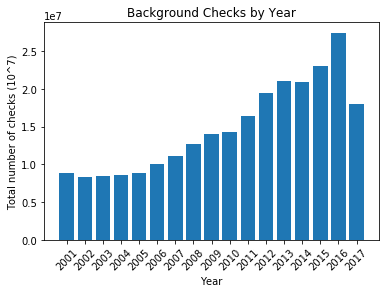

In [338]:
#Plotting a bar graph to depict the trend of background checks done across the country from 2001 to 2017

plt.bar(year_array,total_array)
plt.xticks(rotation=45) 
plt.title('Background Checks by Year')
plt.xlabel('Year')
plt.ylabel('Total number of checks (10^7)')

### Research Question 2 <br>
>Which are the five states with the highest and lowest background checks done so far? (1998-2017 as per data provided)<br>

In [345]:
#Defining a new dataframe with sum of 'totals' grouped by the State. 
gun_bystate = df_gun.groupby('state')['totals'].sum().reset_index() 
gun_bystate.head()

,state,totals
0,Alabama,6706079
1,Alaska,1137643
2,Arizona,4425714
3,Arkansas,3752633
4,California,19014063


In [346]:
#Sorting the dataframe in descending order to determine top 5 and bottom 5 states.

gun_bystate_sorted = gun_bystate.sort_values('totals',ascending=False).reset_index()
gun_bystate_sorted.drop('index',axis=1,inplace=True)
gun_bystate_sorted #reconfirm if dataframe is sorted.

,state,totals
0,Kentucky,29762434
1,Texas,19435186
2,California,19014063
3,Illinois,15471534
4,Pennsylvania,13133876
5,Florida,11695777
6,Ohio,8462744
7,North Carolina,7777689
8,Indiana,7737172
9,Tennessee,7311293


In [347]:
gun_bystate_sorted.head() #Top 5 states with highest number of background checks done so far.


,state,totals
0,Kentucky,29762434
1,Texas,19435186
2,California,19014063
3,Illinois,15471534
4,Pennsylvania,13133876


In [348]:
gun_bystate_sorted.tail()# 5 territories with the lowest number of background checks done so far.

,state,totals
50,Puerto Rico,194464
51,Virgin Islands,15108
52,Guam,14997
53,District of Columbia,5601
54,Mariana Islands,462


<a id='wrangling2'></a>
### Data Wrangling Part 2
#### For Research Questions 3,4,5,6 and 7
<br>


In [349]:
# 'gun_16' created earlier is the dataset that contains records pertaining only to 2016. This data set is then grouped by 
#   State with the sum of the 'totals' column and assigned into a new dataframe. 

gun_bystate_16 = gun_16.groupby('state')['totals'].sum().reset_index() 
gun_bystate_16.head()

# The same steps are done below for the time perids 2012 and 2011-15.

,state,totals
0,Alabama,616947
1,Alaska,87647
2,Arizona,416279
3,Arkansas,266014
4,California,2377167


In [350]:
gun_bystate_12 = gun_12.groupby('state')['totals'].sum().reset_index() 
gun_bystate_12.head()

,state,totals
0,Alabama,431356
1,Alaska,85342
2,Arizona,339663
3,Arkansas,246193
4,California,1132603


In [351]:
gun_bystate_11_15 = gun_11.append([gun_12,gun_13,gun_14,gun_15]) #Appending dataframes to get data pertaining to 2011-15.

In [352]:
gun_bystate_11_15['month'].unique() 
#Reconfirming the time period of records in this dataframe.
# It contains all data from 2011-15.

array(['2011-12', '2011-11', '2011-10', '2011-09', '2011-08', '2011-07',
       '2011-06', '2011-05', '2011-04', '2011-03', '2011-02', '2011-01',
       '2012-12', '2012-11', '2012-10', '2012-09', '2012-08', '2012-07',
       '2012-06', '2012-05', '2012-04', '2012-03', '2012-02', '2012-01',
       '2013-12', '2013-11', '2013-10', '2013-09', '2013-08', '2013-07',
       '2013-06', '2013-05', '2013-04', '2013-03', '2013-02', '2013-01',
       '2014-12', '2014-11', '2014-10', '2014-09', '2014-08', '2014-07',
       '2014-06', '2014-05', '2014-04', '2014-03', '2014-02', '2014-01',
       '2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07',
       '2015-06', '2015-05', '2015-04', '2015-03', '2015-02', '2015-01'],
      dtype=object)

In [353]:
gun_bystate_11_15 = gun_bystate_11_15.groupby('state')['totals'].sum().reset_index() 
gun_bystate_11_15.head()

,state,totals
0,Alabama,2690152
1,Alaska,422189
2,Arizona,1596290
3,Arkansas,1223785
4,California,6642294


In [354]:
#Joining each of the above dataframes with the cleaned Census data dataframe, using inner merge on the 'state' column.


df_combined_16 = gun_bystate_16.merge(df_newcensus,left_on='state',right_on='State',how='inner')
df_combined_12 = gun_bystate_12.merge(df_newcensus,left_on='state',right_on='State',how='inner')
df_combined_11_15 = gun_bystate_11_15.merge(df_newcensus,left_on='state',right_on='State',how='inner')

In [355]:
#Dropping columns not pertaining to 2016

df_combined_16.drop(['State','High school graduate or higher, 2011-2015 (%)',"Bachelor's degree or higher, 2011-2015 (%)",'Men-owned firms, 2012','Women-owned firms, 2012','Minority-owned firms, 2012','Nonminority-owned firms, 2012','Veteran-owned firms, 2012','Nonveteran-owned firms, 2012','Veterans, 2011-2015'],axis=1,inplace=True)

In [356]:
df_combined_16.columns

Index(['state', 'totals', 'Persons under 5 years, 2016 (%)',
       'Persons under 18 years, 2016 (%)',
       'Persons 65 years and over, 2016 (%)', 'White alone, 2016 (%)',
       'Black or African American alone, 2016 (%)',
       'American Indian and Alaska Native alone, 2016 (%)',
       'Asian alone, percent, 2016 (%)',
       'Native Hawaiian and Other Pacific Islander alone, 2016 (%)',
       'Hispanic or Latino, 2016 (%)'],
      dtype='object')

In [357]:
#Dropping columns not pertaining to 2012

df_combined_12.drop(['State','Persons under 5 years, 2016 (%)',
       'Persons under 18 years, 2016 (%)',
       'Persons 65 years and over, 2016 (%)', 'White alone, 2016 (%)',
       'Black or African American alone, 2016 (%)',
       'American Indian and Alaska Native alone, 2016 (%)',
       'Asian alone, percent, 2016 (%)',
       'Native Hawaiian and Other Pacific Islander alone, 2016 (%)',
       'Hispanic or Latino, 2016 (%)','High school graduate or higher, 2011-2015 (%)',
       "Bachelor's degree or higher, 2011-2015 (%)",'Veterans, 2011-2015'],axis=1,inplace=True)

In [358]:
df_combined_12.columns

Index(['state', 'totals', 'Men-owned firms, 2012', 'Women-owned firms, 2012',
       'Minority-owned firms, 2012', 'Nonminority-owned firms, 2012',
       'Veteran-owned firms, 2012', 'Nonveteran-owned firms, 2012'],
      dtype='object')

In [359]:
#Dropping columns not pertaining to 2011-15

df_combined_11_15.drop(['State', 'Persons under 5 years, 2016 (%)',
       'Persons under 18 years, 2016 (%)',
       'Persons 65 years and over, 2016 (%)', 'White alone, 2016 (%)',
       'Black or African American alone, 2016 (%)',
       'American Indian and Alaska Native alone, 2016 (%)',
       'Asian alone, percent, 2016 (%)',
       'Native Hawaiian and Other Pacific Islander alone, 2016 (%)',
       'Hispanic or Latino, 2016 (%)','Men-owned firms, 2012',
       'Women-owned firms, 2012', 'Minority-owned firms, 2012',
       'Nonminority-owned firms, 2012', 'Veteran-owned firms, 2012',
       'Nonveteran-owned firms, 2012'],axis=1,inplace=True)

In [360]:
df_combined_11_15.columns


Index(['state', 'totals', 'High school graduate or higher, 2011-2015 (%)',
       'Bachelor's degree or higher, 2011-2015 (%)', 'Veterans, 2011-2015'],
      dtype='object')

<a id='eda2'></a>
## Exploratory Data Analysis Part 2<br><br>

### Research Question 3 <br>
>Does population of any Age group play a role in then number of background checks done? (based on 2016 data)<br>

Text(0, 0.5, 'Total Background Checks')

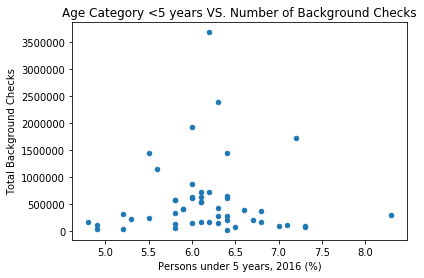

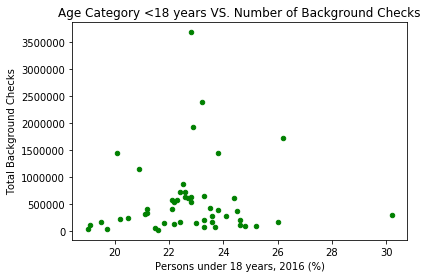

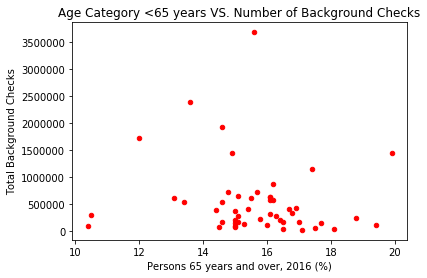

In [361]:
df_combined_16.plot(x='Persons under 5 years, 2016 (%)',y='totals',kind='scatter')
plt.title('Age Category <5 years VS. Number of Background Checks')
plt.ylabel('Total Background Checks')

df_combined_16.plot(x='Persons under 18 years, 2016 (%)',y='totals',kind='scatter',color='green')
plt.title('Age Category <18 years VS. Number of Background Checks')
plt.ylabel('Total Background Checks')

df_combined_16.plot(x='Persons 65 years and over, 2016 (%)',y='totals',kind='scatter',color='red')
plt.title('Age Category <65 years VS. Number of Background Checks')
plt.ylabel('Total Background Checks')

### Research Question 4 <br>

>Does any specific Race play a role in the number of background checks done? (based on 2016 data)<br>

Text(0, 0.5, 'Total Background Checks')

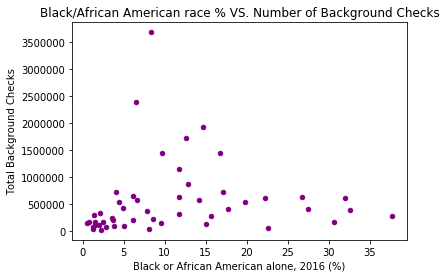

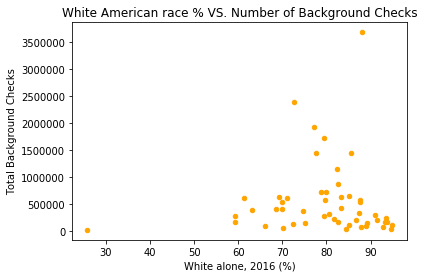

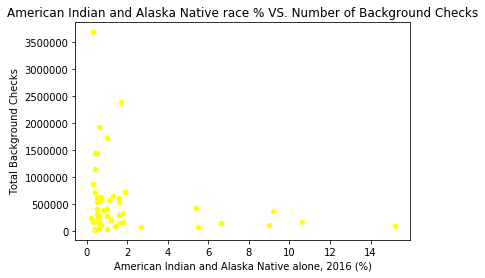

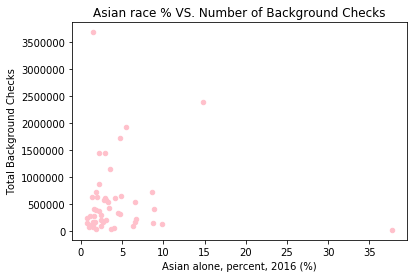

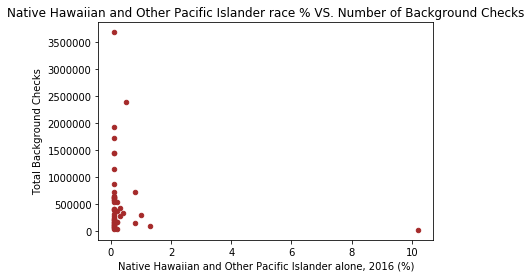

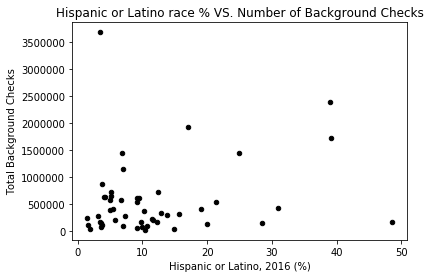

In [362]:
df_combined_16.plot(x='Black or African American alone, 2016 (%)',y='totals',kind='scatter',color='purple')
plt.title('Black/African American race % VS. Number of Background Checks')
plt.ylabel('Total Background Checks')

df_combined_16.plot(x='White alone, 2016 (%)',y='totals',kind='scatter',color='orange')
plt.title('White American race % VS. Number of Background Checks')
plt.ylabel('Total Background Checks')

df_combined_16.plot(x='American Indian and Alaska Native alone, 2016 (%)',y='totals',kind='scatter',color='yellow')
plt.title('American Indian and Alaska Native race % VS. Number of Background Checks')
plt.ylabel('Total Background Checks')

df_combined_16.plot(x='Asian alone, percent, 2016 (%)',y='totals',kind='scatter',color='pink')
plt.title('Asian race % VS. Number of Background Checks')
plt.ylabel('Total Background Checks')

df_combined_16.plot(x='Native Hawaiian and Other Pacific Islander alone, 2016 (%)',y='totals',kind='scatter',color='brown')
plt.title('Native Hawaiian and Other Pacific Islander race % VS. Number of Background Checks')
plt.ylabel('Total Background Checks')

df_combined_16.plot(x='Hispanic or Latino, 2016 (%)',y='totals',kind='scatter',color='black')
plt.title('Hispanic or Latino race % VS. Number of Background Checks')
plt.ylabel('Total Background Checks')

### Research Question 5 <br>
>Does Firm ownership play a role in the number of background checks done? (based on 2012 data)<br>


Text(0, 0.5, 'Total Background Checks')

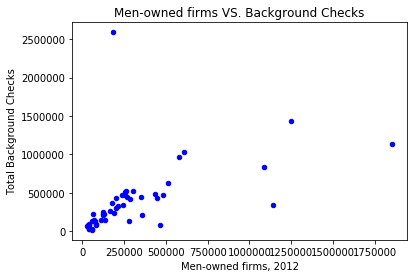

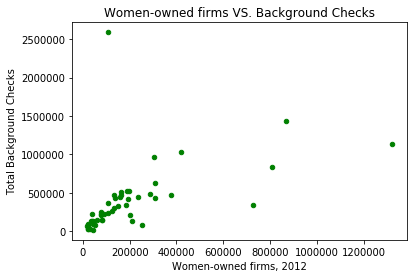

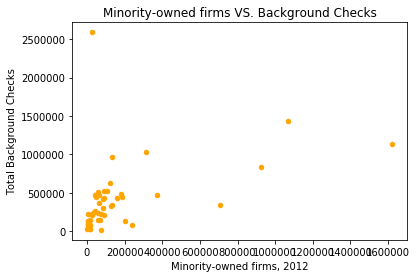

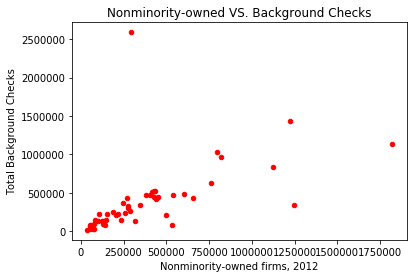

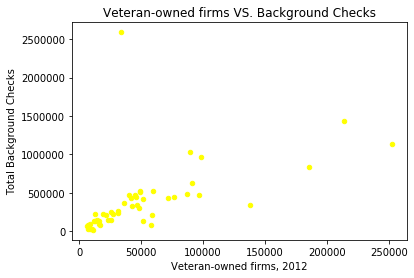

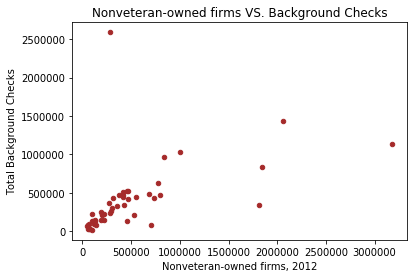

In [363]:
df_combined_12.plot(x='Men-owned firms, 2012',y='totals',kind='scatter',color='blue')
plt.title('Men-owned firms VS. Background Checks')
plt.ylabel('Total Background Checks')

df_combined_12.plot(x='Women-owned firms, 2012',y='totals',kind='scatter',color='green')
plt.title('Women-owned firms VS. Background Checks')
plt.ylabel('Total Background Checks')

df_combined_12.plot(x='Minority-owned firms, 2012',y='totals',kind='scatter',color='orange')
plt.title('Minority-owned firms VS. Background Checks')
plt.ylabel('Total Background Checks')

df_combined_12.plot(x='Nonminority-owned firms, 2012',y='totals',kind='scatter',color='red')
plt.title('Nonminority-owned VS. Background Checks')
plt.ylabel('Total Background Checks')

df_combined_12.plot(x='Veteran-owned firms, 2012',y='totals',kind='scatter',color='yellow')
plt.title('Veteran-owned firms VS. Background Checks')
plt.ylabel('Total Background Checks')

df_combined_12.plot(x='Nonveteran-owned firms, 2012',y='totals',kind='scatter',color='brown')
plt.title('Nonveteran-owned firms VS. Background Checks')
plt.ylabel('Total Background Checks')


### Research Question 6 <br>
>Does the percent of Educated population play a role in the number of background checks done? (based on 2011-15 data)<br>


Text(0, 0.5, 'Total Background Checks')

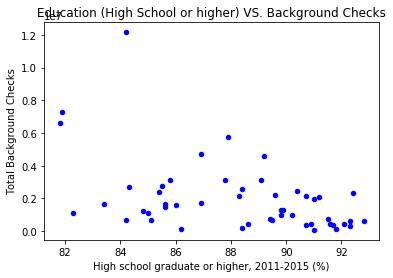

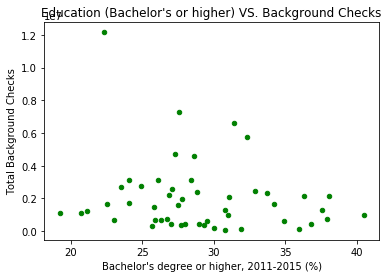

In [364]:
df_combined_11_15.plot(x='High school graduate or higher, 2011-2015 (%)',y='totals',kind='scatter',color='blue')
plt.title('Education (High School or higher) VS. Background Checks')
plt.ylabel('Total Background Checks')

df_combined_11_15.plot(x="Bachelor's degree or higher, 2011-2015 (%)",y='totals',kind='scatter',color='green')
plt.title("Education (Bachelor's or higher) VS. Background Checks")
plt.ylabel('Total Background Checks')

### Research Question 7 <br>
>Does the number of veteran population play a role in the number of background checks done? (based on 2011-15 data)<br>

Text(0, 0.5, 'Total Background Checks')

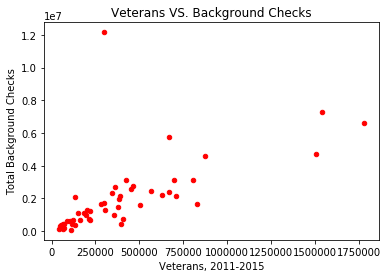

In [365]:
df_combined_11_15.plot(x='Veterans, 2011-2015',y='totals',kind='scatter',color='red')
plt.title('Veterans VS. Background Checks')
plt.ylabel('Total Background Checks')

<a id='conclusions'></a>
## Conclusions

After performing the analysis we can come down to the following conclusions for the research questions asked in the beginning.<br>

1- The overall trend of background checks performed has clearly increased consistently from 2001 to 2017, indicating that more people decide to buy firearms as each year passes. A significant decrease can be oberved in the number of background checks done in 2017. However, it is possible that this is beacause the dataset does not contain 2017 data for the whole year. Data provided is only up until August 2017.<br><br>
2- Five States with the highest number of background checks done from 1998-17 are: Kentucky, Texas, California, Illinois, Pennsylvania.<br>
Lowest number of background checks done from 1998-17 are in the five territories: Puerto Rico, Virgin Islands, Guam, District of Columbia, Mariana Islands.<br><br>
3- After comparing the differnt cateogries of Age with the number of background checks,based on 2016 data alone, we can conclude that majority of the states stand at a population percent of 5.8% to 7% for persons of age 5 and below; 21% to 25% for persons of age 18 and under; 14% to 18% for persons of age 65 and above. <br> However, no specific pattern or correlation can be observed with any age category and the total number of background checks in the state.<br><br>
4- After analysing the percent population of different races across the country, based on 2016 data alone, we can conclude that majority of states have a Black/African American population of less than 10%; Almost all states have a White American population of 60% or more; Most states have an American Indian/Alaska native population of less than 2%; Almost all states have Asian population of less than 10%; Native Hawaiian/Pacific Islander population of <1% and most states have a Hispanic/Latino population between 2% to 15%. <br>
However, no conclusion based on race can be made with correlation to the number of background checks as the analysis does not depict a consistent increase or deacrease with any race.<br><br>
5- After observing numbers of different firm ownerships in the country, based on 2012 data, it is seen that majority of the states fall under the range of 0-350k for their number of men-owned firms, 0-200k for women-owned firms, 0-175k for minority-owned firms, 0-400k for non-minority owned firms, 0-60k for veteran owned firms and 0-500k for non-veteran owned firms. <br>
We also observe a linear relationship for each of these categories when we compare them to the total number of background checks in the state. As this pattern is consistent for all the categories, we can conclude that the total number of firms in each state is positively correlated to the number of background checks done in the state,i.e, when the nubmer of firms in a state increases, the number of background checks done in the state increases. 
<br><br>
6- On comparing the educated percent of people with the number of background checks, based on 2011-15 data, we can see that in all the states atleast 80% of people have completed High School education or more with a maximum of 93% in one state. Most states have a percent population that has completed Bachelor's degree or higher within the range of 23%-37%.<br>
No conclusive insight can be made with respect to the relationship between the number of background checks and education. There is no significant pattern present. <br><br>
7-When analysing veteran data based on 2011-15 data, we can observe than majority of states have a veteran popultion that ranges between 0-500k. <br>
Additionally, a significant linear relationship can be observed between the number of veterans in the State and the number of background checks done in the state, indicating a positive correlation. 
<br><br>
In conclusion, we can say that the number of background checks are higher in states with a larger number of firms and a higher number of veteran population, indicating that in these states more people decide to purchase firearms. Race, Education and Age do not have a noticeable effect on background checks. 

### Limitations

- Outliers exist in the data and were not eliminated, which could have manipulated the results. 
